# 朝阳医院2018年销售数据

## 一、提出问题

我们需要了解到朝阳医院销售情况。针对这个数据，需要了解到以下4个数据并作图：

月均消费次数

月均消费金额

客单价

消费趋势

在明确我们需要研究的对象以及指数后，我们就可以导入数据了

## 二、了解数据

首先需要了解数据结构，方便在之后进行数据清洗和预处理

### 导入python库

In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import calendar

### 导入数据

In [13]:
path=r'F:\Data\chaoyangyiyuan9062\朝阳医院2018年销售数据.xlsx'
df=pd.read_excel(path)

### 成功读取文件之后查看数据格式

In [14]:
df.head()

,购药时间,社保卡号,商品编码,商品名称,销售数量,应收金额,实收金额
0,2018-01-01 星期五,1.616528e+06,236701.0,强力VC银翘片,6.0,82.8,69.00
1,2018-01-02 星期六,1.616528e+06,236701.0,清热解毒口服液,1.0,28.0,24.64
2,2018-01-06 星期三,1.260283e+07,236701.0,感康,2.0,16.8,15.00
3,2018-01-11 星期一,1.007034e+10,236701.0,三九感冒灵,1.0,28.0,28.00
4,2018-01-15 星期五,1.015543e+08,236701.0,三九感冒灵,8.0,224.0,208.00


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6578 entries, 0 to 6577
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   购药时间    6576 non-null   object 
 1   社保卡号    6576 non-null   float64
 2   商品编码    6577 non-null   float64
 3   商品名称    6577 non-null   object 
 4   销售数量    6577 non-null   float64
 5   应收金额    6577 non-null   float64
 6   实收金额    6577 non-null   float64
dtypes: float64(5), object(2)
memory usage: 359.9+ KB


## 三、数据清洗

### 查看空值

In [16]:
df.isnull().sum()

购药时间    2
社保卡号    2
商品编码    1
商品名称    1
销售数量    1
应收金额    1
实收金额    1
dtype: int64

### 删除空值

In [17]:
df=df.dropna(subset=['社保卡号'],how='any')

In [18]:
df

,购药时间,社保卡号,商品编码,商品名称,销售数量,应收金额,实收金额
0,2018-01-01 星期五,1.616528e+06,236701.0,强力VC银翘片,6.0,82.8,69.00
1,2018-01-02 星期六,1.616528e+06,236701.0,清热解毒口服液,1.0,28.0,24.64
2,2018-01-06 星期三,1.260283e+07,236701.0,感康,2.0,16.8,15.00
3,2018-01-11 星期一,1.007034e+10,236701.0,三九感冒灵,1.0,28.0,28.00
4,2018-01-15 星期五,1.015543e+08,236701.0,三九感冒灵,8.0,224.0,208.00
...,...,...,...,...,...,...,...
6572,2018-04-27 星期三,1.006048e+10,2367011.0,高特灵,1.0,5.6,5.00
6573,2018-04-27 星期三,1.078861e+08,2367011.0,高特灵,10.0,56.0,54.80
6575,2018-04-27 星期三,1.008787e+10,2367011.0,高特灵,2.0,11.2,9.86
6576,2018-04-27 星期三,1.340663e+07,2367011.0,高特灵,1.0,5.6,5.00


### 查看数据类型

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6576 entries, 0 to 6577
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   购药时间    6575 non-null   object 
 1   社保卡号    6576 non-null   float64
 2   商品编码    6576 non-null   float64
 3   商品名称    6576 non-null   object 
 4   销售数量    6576 non-null   float64
 5   应收金额    6576 non-null   float64
 6   实收金额    6576 non-null   float64
dtypes: float64(5), object(2)
memory usage: 411.0+ KB


### 将购药时间转化为时间类型

In [20]:
# 这里存在'2019-02-29'的错误时间，舍弃
df=df.drop(df[df['购药时间'].str[:10]=='2018-02-29'].index)

In [21]:
# 显示数据的空行
df[df['购药时间'].isnull()]

,购药时间,社保卡号,商品编码,商品名称,销售数量,应收金额,实收金额
6570,NaN,11778628.0,2367011.0,高特灵,10.0,56.0,56.0


In [22]:
# 舍弃数据
df=df.loc[df['购药时间'].dropna().index]

In [23]:
# 数据转换
df['Date']=pd.to_datetime(df['购药时间'].str[:10],format='%Y-%m-%d')

In [24]:
# 查看数据
df.Date

0      2018-01-01
1      2018-01-02
2      2018-01-06
3      2018-01-11
4      2018-01-15
          ...    
6572   2018-04-27
6573   2018-04-27
6575   2018-04-27
6576   2018-04-27
6577   2018-04-28
Name: Date, Length: 6552, dtype: datetime64[ns]

### 修改列名

In [25]:
df.rename(columns={'购药时间':'销售时间'},inplace=True)

### 数据排序

In [28]:
df=df.sort_values('Date')

In [29]:
# 索引排序
df=df.reset_index(drop=True)

### 检查数据

In [30]:
df.describe()

,社保卡号,商品编码,销售数量,应收金额,实收金额
count,6.552000e+03,6.552000e+03,6552.000000,6552.00000,6552.000000
mean,6.095150e+09,1.015031e+06,2.384158,50.43025,46.266972
std,4.888430e+09,5.119572e+05,2.374754,87.68075,81.043956
min,1.616528e+06,2.367010e+05,-10.000000,-374.00000,-374.000000
25%,1.014290e+08,8.614560e+05,1.000000,14.00000,12.320000
50%,1.001650e+10,8.615070e+05,2.000000,28.00000,26.500000
75%,1.004898e+10,8.687840e+05,2.000000,59.60000,53.000000
max,1.283612e+10,2.367012e+06,50.000000,2950.00000,2650.000000


In [31]:
# 这里发现销售数量，应收金额和实收金额存在负数，应该进行处理
df=df.drop(df[(df['销售数量']<=0) | (df['应收金额']<=0)].index)

### 查找重复数据

In [32]:
df.duplicated().sum()

0

## 四、数据分析

### 月均消费次数

In [33]:
df_month_count=df.drop_duplicates(subset=['销售时间','社保卡号'])
day_number=(max(df_month_count.Date)-min(df_month_count.Date)).days
print('月均消费次数：%.2f' %(len(df_month_count)/(day_number//30)))

月均消费次数：890.83


### 月均消费金额

In [34]:
money_sum=df['实收金额'].sum()
print('月均实收金额：%.2f' %(money_sum/(day_number//30)))

月均实收金额：50672.49


### 客单价

In [36]:
print('客单价：%.2f' %(money_sum/df_month_count.shape[0]))

客单价：56.88


### 消费趋势

In [37]:
# 将索引编程日期，方便之后进行重采样
dd=df.set_index('Date',drop=True)

Text(0, 0.5, 'money_sum')

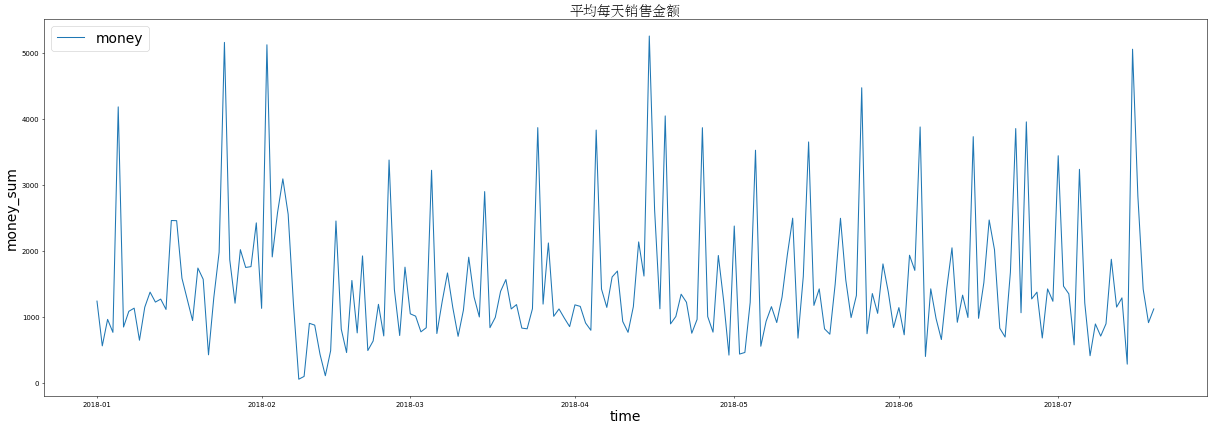

In [42]:
# 按天采样
dd_day=dd.resample('D').sum()
plt.figure(figsize=(30,10),dpi=50)
plt.plot(dd_day.index,dd_day['实收金额'])
plt.title('平均每天销售金额',fontproperties='STSong',fontsize=20)
plt.legend(['money'],fontsize=20)
plt.xlabel('time',fontsize=20)
plt.ylabel('money_sum',fontsize=20)

Text(0, 0.5, 'money_sum')

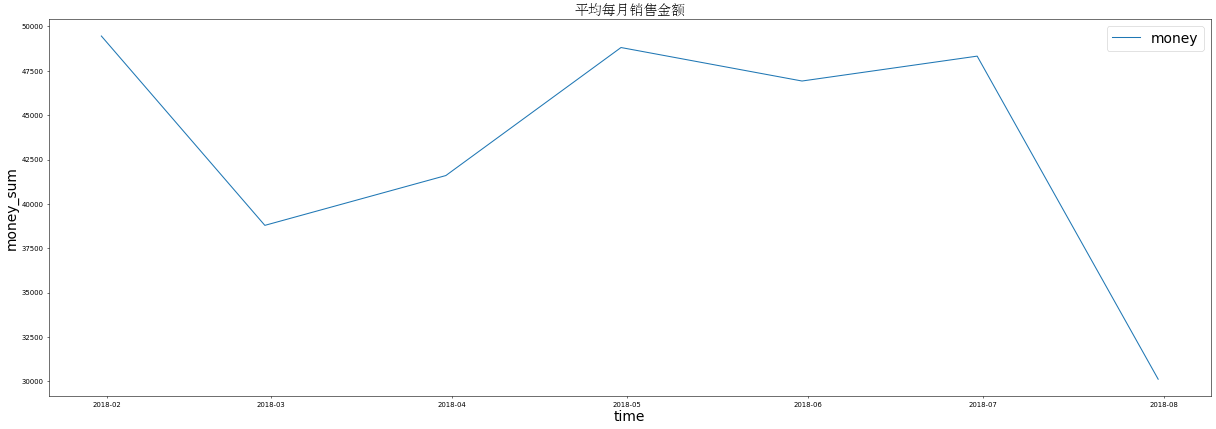

In [43]:
# 按月采样
dd_month=dd.resample('M').sum()
plt.figure(figsize=(30,10),dpi=50)
plt.plot(dd_month.index,dd_month['实收金额'])
plt.title('平均每月销售金额',fontproperties='STSong',fontsize=20)
plt.legend(['money'],fontsize=20)
plt.xlabel('time',fontsize=20)
plt.ylabel('money_sum',fontsize=20)

In [46]:
# 按星期采样
# 对星期进行自定义排序
df['销售星期']=df['销售时间'].str[11:]
week=['星期一','星期二','星期三','星期四','星期五','星期六','星期日']
df['销售星期']=df['销售星期'].astype('category').cat.set_categories(week)
df=df.sort_values(by=['销售星期'])

In [47]:
# 销售星期分析
df=df.sort_values('销售星期')
money_week=df.groupby(['销售星期'])['实收金额'].sum()

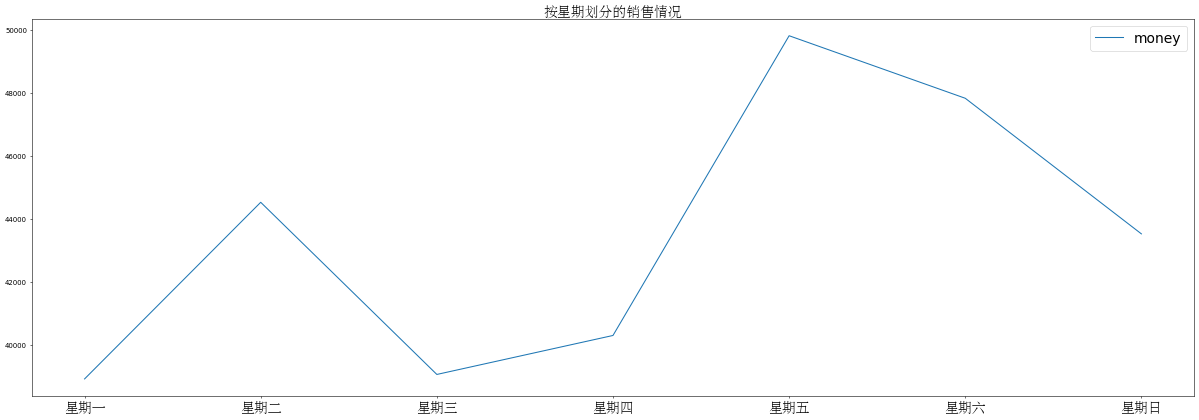

In [49]:
# 作图
plt.figure(figsize=(30,10),dpi=50)
plt.plot(money_week.index,money_week)
plt.xticks(money_week.index,fontproperties='STSong',fontsize=20)
plt.title('按星期划分的销售情况',fontproperties='STSong',fontsize=20)
plt.legend(['money'],fontsize=20)

我们可以发现，周五周六的销售总额要显著的的高于其他日期，即周五周六应该前来买药的人更多，销售的药品更多

每周的销售趋势是周日到周四销售总额会有波动，但是幅度不大，周五周六的销售总额相对较高，按月份比较的话，四月份的销售总额显著的高，而二月份的销售总额显著的低，猜测销售总额非常低是因为春节的缘故